## Homework 5: Parallel bifurcation and spectrogram

### Import Library

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image
import os
import pickle
import random

from plotly import graph_objs as go
from plotly import express as px
from scipy import fft

from threading import Thread
from multiprocessing import Pool, Process

import warnings
warnings.filterwarnings('ignore')

### Functions

### Task 5.1

In [2]:
def logistic_map_step(x, r):
    return r*x * (1 - x)

def bifurcation_map(r, m: int=1, n: int=1):
    '''
    m - number of last values
    n - number of first values
    '''
    Y = np.zeros((len(r), m))
    for i in range(len(r)):
        Y[i, 0] = np.random.random()
        for j in range(m+n-1):
            if j >= n:
                Y[i, j-n+1] = logistic_map_step(Y[i, j-n], r[i])
            else:
                Y[i, 0] = logistic_map_step(Y[i, 0], r[i])
    
    return Y

In [59]:
np.random.uniform(0, 1, 100001)

array([0.5173167 , 0.61125542, 0.95044798, ..., 0.57622603, 0.86338565,
       0.08536582])

In [67]:
size = 1000001
r = np.linspace(1, 4, size)
Y = np.random.uniform(0, 1, size)
with Pool(processes=1) as pool:
    results = pool.starmap(func=logistic_map_step, iterable=zip(Y, r))

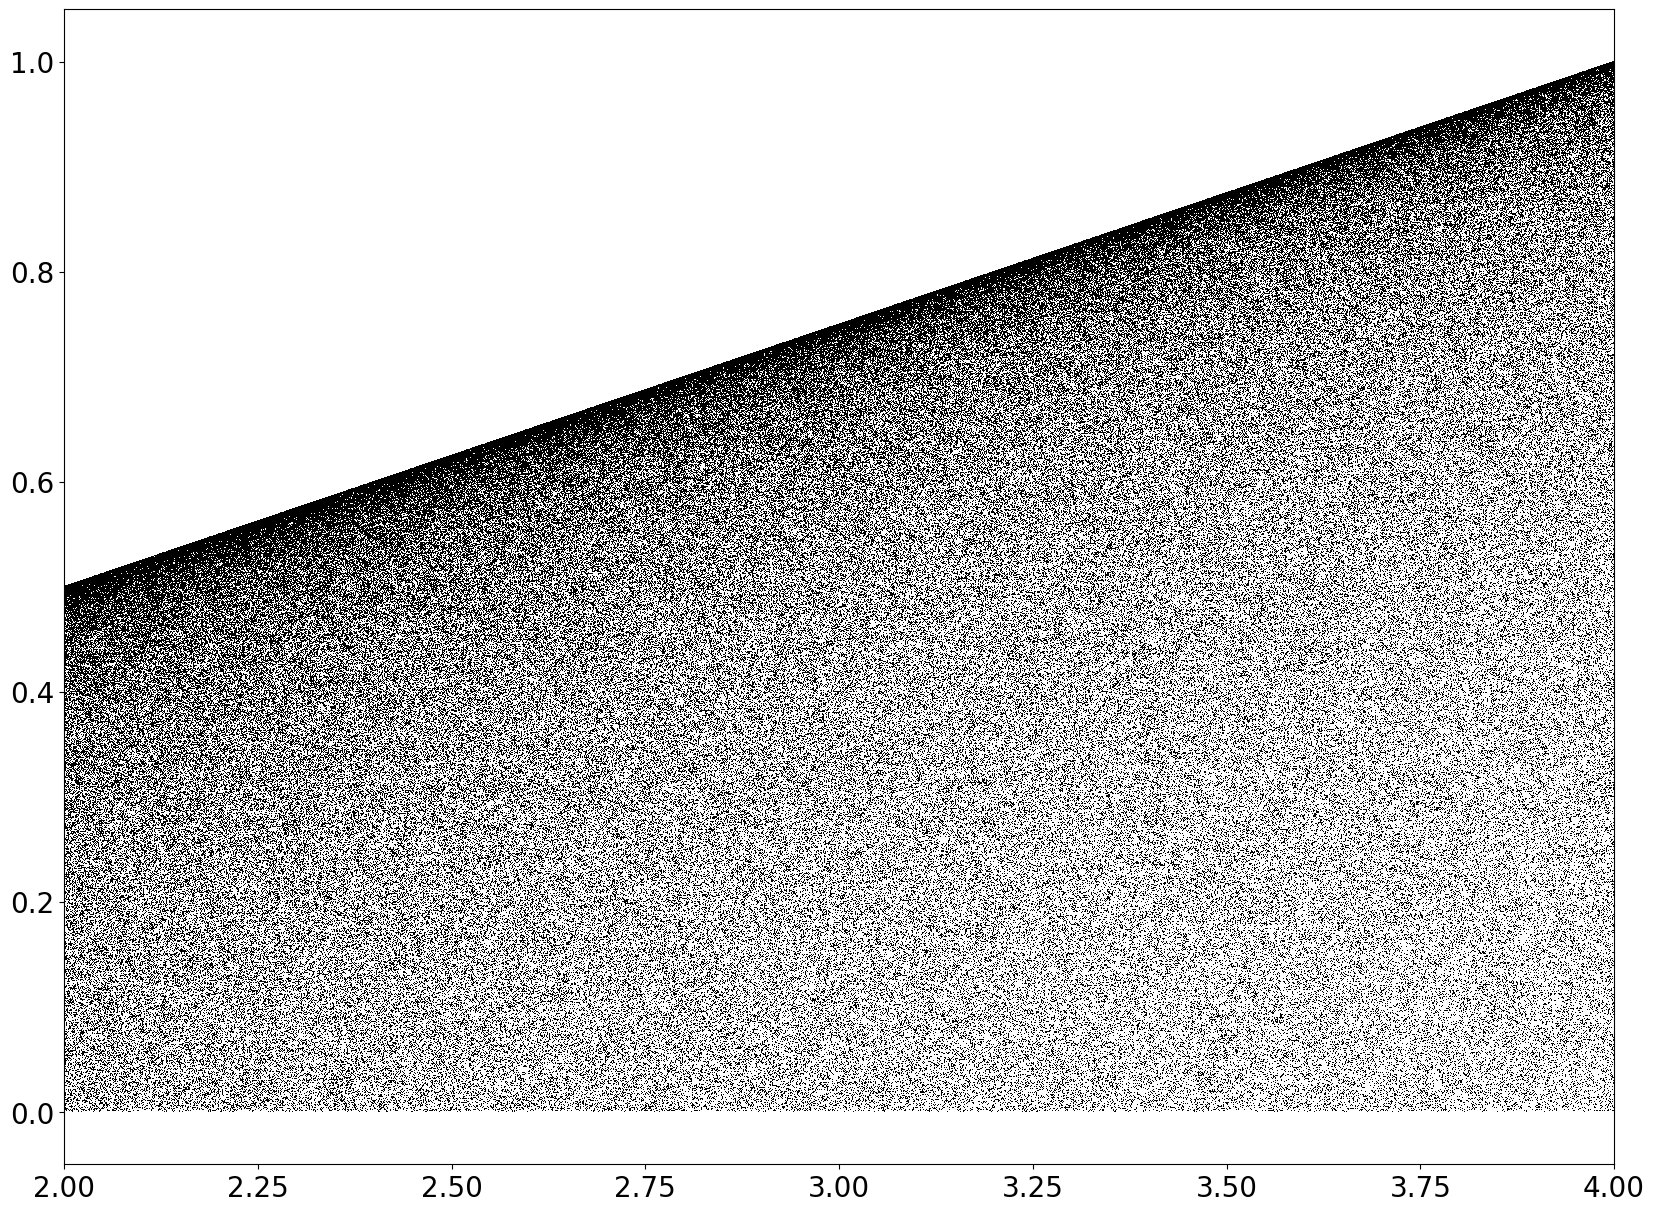

In [68]:
fig = plt.figure(figsize=[20, 15], )
plt.plot(r, results, ls='', marker=',', color='black')
plt.xlim([2, 4])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
threads = []
for i in range(6):
    thread = Thread(target=bifurcation_map, kwargs={'r': np.linspace(1, 4, 1000001), 'm': 1, 'n': 200})
    threads.append(thread)
    threads[i].start()

for thread in threads:
    thread.join()

In [3]:
processes = []
for i in range(6):
    process = Process(target=bifurcation_map, kwargs={'r': np.linspace(1, 4, 1000001), 'm': 1, 'n': 200})
    processes.append(process)
    processes[i].start()

for process in processes:
    process.join()

KeyboardInterrupt: 

In [10]:
thread1 = Thread(target=bifurcation_map, kwargs={'r': np.linspace(1, 4, 1000001), 'm': 1, 'n': 200})
thread2 = Thread(target=bifurcation_map, kwargs={'r': np.linspace(1, 4, 1000001), 'm': 1, 'n': 200})

thread1.start()
thread2.start()

thread1.join()
thread2.join()

In [11]:
process1 = Process(target=bifurcation_map, kwargs={'r': np.linspace(1, 4, 1000001), 'm': 1, 'n': 200})
process2 = Process(target=bifurcation_map, kwargs={'r': np.linspace(1, 4, 1000001), 'm': 1, 'n': 200})

process1.start()
process2.start()

process1.join()
process2.join()

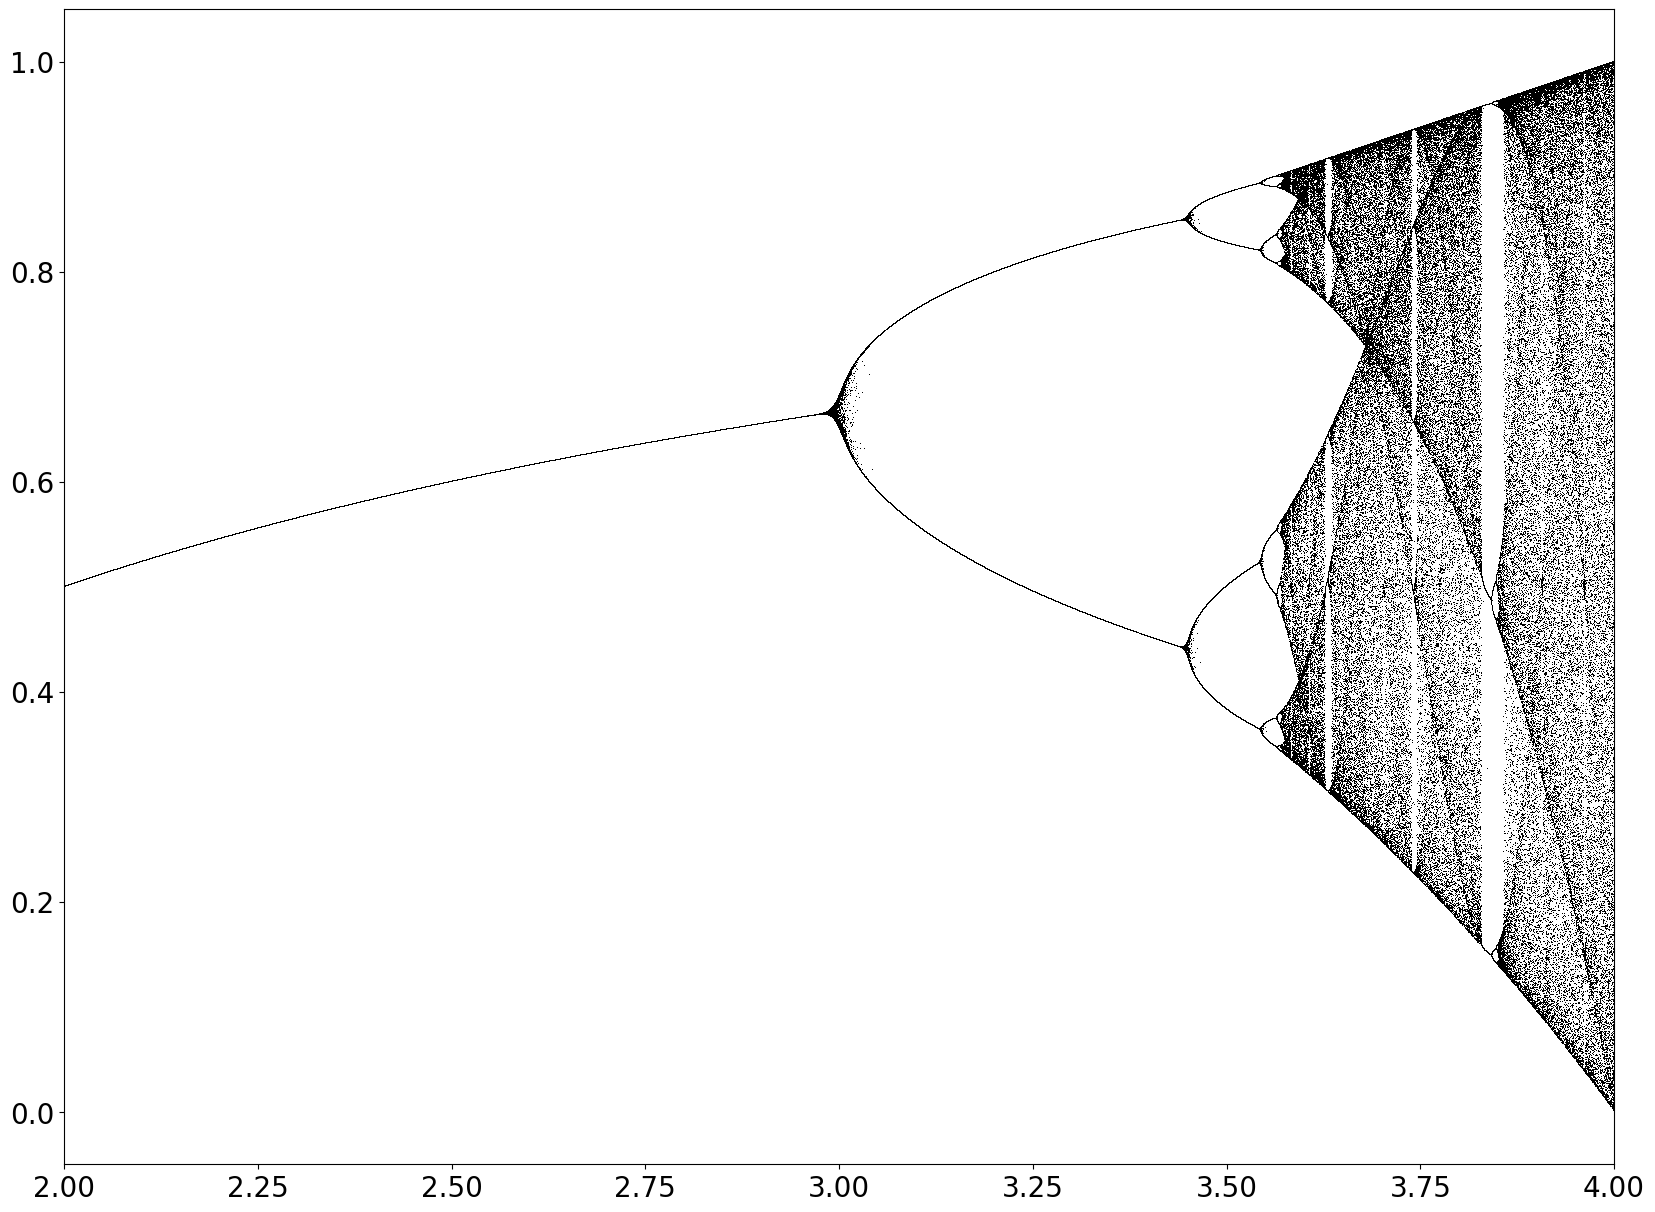

In [8]:
r_params = np.linspace(1, 4, 1000001)
Y = bifurcation_map(
    r=r_params,
    m=1,
    n=200,
)
fig = plt.figure(figsize=[20, 15], )
plt.plot(r_params, Y, ls='', marker=',', color='black')
plt.xlim([2, 4])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### Task 5.2

### Task 5.3

In [118]:
def specsgram(nwindowstep, window_width: int=25):
    global t, step, signal

    end = nwindowstep*step + t[0]

    window_func = np.exp(-(t-end)**2 / 2 / window_width**2)

    windowed_signal = signal * window_func
    spectrum = np.fft.fft(windowed_signal)
    w = np.fft.fftfreq(len(windowed_signal), d=(t[1]-t[0]) / (2*np.pi))

    freq_range = np.logical_and(w > 0, w < 6)
    w = w[freq_range]        
    intensity = np.abs(spectrum[freq_range])**2
    plt.scatter([end] * len(w), w, c=intensity)
    return end, w, intensity

In [120]:
def get_specgram(signal: np.array, t: np.array, nwindowsteps: int, window_width: int):

    plt.figure(figsize=(10, 6))

    step = (t[-1] - t[0]) / nwindowsteps
    for i in range(nwindowsteps):
        end = i*step + t[0]

        window_func = np.exp(-(t-end)**2 / 2 / window_width**2)

        windowed_signal = signal * window_func
        spectrum = np.fft.fft(windowed_signal)
        w = np.fft.fftfreq(len(windowed_signal), d=(t[1]-t[0]) / (2*np.pi))

        freq_range = np.logical_and(w > 0, w < 6)
        w = w[freq_range]        
        intensity = np.abs(spectrum[freq_range])**2
    
        plt.scatter([end] * len(w), w, c=intensity)

    plt.title("Spectrogram")
    plt.ylabel("Frequency [Hz]")
    plt.xlabel("Time [sec]")

In [ ]:
t=np.linspace(-20*2*np.pi, 20*2*np.pi, 2**14)
# 1st wave packet
y1=np.sin(t)*np.exp(-t**2/2/20**2)
# 2nd wave packet
y2=y1+np.sin(3*t)*np.exp(-(t-5*2*np.pi)**2/2/20**2)
# 3rd wave packet
y3=y2+np.sin(5.5*t)*np.exp(-(t-10*2*np.pi)**2/2/5**2)
# 4st wave packet
signal=y3+np.sin(4*t)*np.exp(-(t-7*2*np.pi)**2/2/5**2)

get_specgram(signal=signal, t=t, nwindowsteps=10000, window_width=25)
#plt.close()

In [111]:
nwindowsteps = 10000
window_width = 25
step = (t[-1] - t[0]) / nwindowsteps
for i in range(nwindowsteps):
    end = i*step + t[0]

    window_func = np.exp(-(t-end)**2 / 2 / window_width**2)

    windowed_signal = signal * window_func
    spectrum = np.fft.fft(windowed_signal)
    w = np.fft.fftfreq(len(windowed_signal), d=(t[1]-t[0]) / (2*np.pi))

    freq_range = np.logical_and(w > 0, w < 6)
    w = w[freq_range]        
    intensity = np.abs(spectrum[freq_range])**2

In [119]:
nwindowsteps = 10000
step = (t[-1] - t[0]) / nwindowsteps
with Pool(processes=2) as pool:
    results = pool.map(func=specsgram, iterable=np.arange(nwindowsteps))

In [121]:
plt.show()

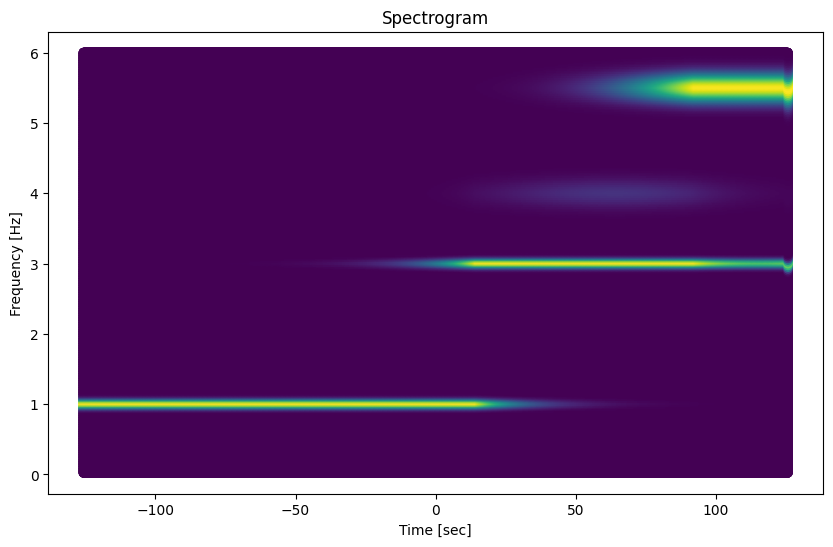

In [117]:
plt.figure(figsize=(10, 6))
for end, w, intensity in results:
    plt.scatter([end] * len(w), w, c=intensity)

plt.title("Spectrogram")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [sec]")
plt.show()


### Task 5.4